# Pivot Tables

We have seen how the ``GroupBy`` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference between pivot tables and ``GroupBy`` can sometimes cause confusion; it helps me to think of pivot tables as essentially a *multidimensional* version of ``GroupBy`` aggregation.
That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

---
# Tablas dinamicas

Hemos visto cómo la abstracción ``GroupBy`` nos permite explorar las relaciones dentro de un conjunto de datos. Una tabla dinámica es una operación similar que se ve comúnmente en hojas de cálculo y otros programas que operan con datos tabulares. La tabla dinámica toma datos simples de columnas como entrada y agrupa las entradas en una tabla bidimensional que proporciona un resumen multidimensional de los datos. 
La diferencia entre las tablas dinámicas y ``GroupBy`` a veces puede causar confusión; me ayuda a pensar en las tablas dinámicas como esencialmente una versión *multidimensional* de la agregación ``GroupBy``. 
Es decir, divide-aplica-combina, pero tanto la división como la combinación ocurren no en un índice unidimensional, sino en una cuadrícula bidimensional.

## Motivating Pivot Tables

For the examples in this section, we'll use the database of passengers on the *Titanic*, available through the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)):

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [21]:
titanic.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


This contains a wealth of information on each passenger of that ill-fated voyage, including gender, age, class, fare paid, and much more.

---

Contiene una gran cantidad de información sobre cada pasajero de ese viaje desafortunado, incluido el sexo, la edad, la clase, la tarifa pagada y mucho más.

## Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof.
If you have read the previous section, you might be tempted to apply a ``GroupBy`` operation–for example, let's look at survival rate by gender:

---

Para comenzar a aprender más sobre estos datos, podríamos comenzar agrupando según el género, el estado de supervivencia o alguna combinación de los mismos. Si ha leído la sección anterior, es posible que tenga la tentación de aplicar una operación ``GroupBy``; por ejemplo, veamos la tasa de supervivencia por género:

In [5]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival by both sex and, say, class.
Using the vocabulary of ``GroupBy``, we might proceed using something like this:
we *group by* class and gender, *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and then *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

---

Esto inmediatamente nos da una idea: en general, tres de cada cuatro hembras a bordo sobrevivieron, ¡mientras que solo uno de cada cinco machos sobrevivió!

Esto es útil, pero nos gustaría ir un paso más profundo y analizar la supervivencia tanto por sexo como, por ejemplo, por clase. Usando el vocabulario de ``GroupBy``, podríamos proceder usando algo como esto: 
*group by* clase y género, *select* supervivencia, *apply* un mean(), *combine* los grupos resultantes y luego *unstack* el índice jerárquico para revelar la multidimensionalidad oculta. En codigo:

In [28]:
titanic.groupby(['sex', 'class'])[['survived']].mean().unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [4]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Mi prueba de concepto

## De estas formas determino la edad promedio de cada hombre y mujer, tanto sobreviviente como fallecida

In [33]:
titanic.groupby(['survived','sex'])['age'].mean().unstack()

sex,female,male
survived,,
0,25.046875,31.618056
1,28.847716,27.276022


In [34]:
titanic.pivot_table('age','survived','sex')

sex,female,male
survived,,
0,25.046875,31.618056
1,28.847716,27.276022


This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional ``GroupBy`` is common enough that Pandas includes a convenience routine, ``pivot_table``, which succinctly handles this type of multi-dimensional aggregation.

---

Esto nos da una mejor idea de cómo el género y la clase afectaron la supervivencia, pero el código comienza a verse un poco confuso. Si bien cada paso de esta canalización tiene sentido a la luz de las herramientas que hemos discutido anteriormente, la larga cadena de código no es particularmente fácil de leer o usar.
Este ``GroupBy`` bidimensional es lo suficientemente común como para que Pandas incluya una rutina de conveniencia, ``pivot_table``, que maneja sucintamente este tipo de agregación multidimensional.

## Pivot Table Syntax

Here is the equivalent to the preceding operation using the ``pivot_table`` method of ``DataFrame``s:

---

Aquí está el equivalente a la operación anterior usando el método ``pivot_table`` de ``DataFrames``:

In [11]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the ``groupby`` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both women and higher classes.
First-class women survived with near certainty (hi, Rose!), while only one in ten third-class men survived (sorry, Jack!).

---


Esto es eminentemente más legible que el ``groupby`` y produce el mismo resultado. Como era de esperar de un crucero transatlántico de principios del siglo XX, el gradiente de supervivencia favorece tanto a las mujeres como a las clases más altas. Las mujeres de primera clase sobrevivieron casi con certeza (¡hola, Rose!), Mientras que solo uno de cada diez hombres de tercera clase sobrevivió (¡lo siento, Jack!).

### Multi-level pivot tables

Just as in the ``GroupBy``, the grouping in pivot tables can be specified with multiple levels, and via a number of options.
For example, we might be interested in looking at age as a third dimension.
We'll bin the age using the ``pd.cut`` function:

---

Al igual que en ``GroupBy``, la agrupación en tablas dinámicas se puede especificar con varios niveles y mediante varias opciones. Por ejemplo, podríamos estar interesados ​​en considerar la edad como una tercera dimensión. Agruparemos la edad usando la función ``pd.cut``:

In [13]:
age = pd.cut(titanic['age'], [0,18,80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [15]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid using ``pd.qcut`` to automatically compute quantiles:

---

También podemos aplicar la misma estrategia cuando trabajamos con las columnas; agreguemos información sobre la tarifa pagada usando pd.qcut para calcular automáticamente los cuantiles:

In [19]:
fare = pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [20]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

The result is a four-dimensional aggregation with hierarchical indices (see [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb)), shown in a grid demonstrating the relationship between the values.

---

El resultado es una agregación de cuatro dimensiones con índices jerárquicos (consulte Indexación jerárquica), que se muestra en una cuadrícula que demuestra la relación entre los valores.

### Additional pivot table options

The full call signature of the ``pivot_table`` method of ``DataFrame``s is as follows:

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

We've already seen examples of the first three arguments; here we'll take a quick look at the remaining ones.
Two of the options, ``fill_value`` and ``dropna``, have to do with missing data and are fairly straightforward; we will not show examples of them here.

The ``aggfunc`` keyword controls what type of aggregation is applied, which is a mean by default.
As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., ``'sum'``, ``'mean'``, ``'count'``, ``'min'``, ``'max'``, etc.) or a function that implements an aggregation (e.g., ``np.sum()``, ``min()``, ``sum()``, etc.).
Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

---

### Opciones adicionales de tabla dinámica

La firma de llamada completa del método ``pivot_table`` de ``DataFrames`` es la siguiente:

```python
# forma de llamar a partir de Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

Ya hemos visto ejemplos de los tres primeros argumentos; aquí echaremos un vistazo rápido a los restantes. Dos de las opciones, ``fill_value`` y ``dropna``, tienen que ver con datos faltantes y son bastante sencillas; no mostraremos ejemplos de ellos aquí.

La palabra clave ``aggfunc`` controla qué tipo de agregación se aplica, que es una ``mean`` por defecto. Como en GroupBy, la especificación de agregación puede ser una cadena que represente una de varias opciones comunes (por ejemplo, ``sum``, ``mean``, ``count``, ``min``, ``max``, etc.) o una función que implemente una agregación (por ejemplo, ``np.sum()``, ``min()``, ``sum()``, etc.). Además, se puede especificar como un diccionario que asigna una columna a cualquiera de las opciones deseadas anteriores:

In [8]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the ``values`` keyword; when specifying a mapping for ``aggfunc``, this is determined automatically.

---

Observe también aquí que hemos omitido la palabra clave de ``values``; al especificar un mapeo para ``aggfunc``, esto se determina automáticamente.

At times it's useful to compute totals along each grouping.
This can be done via the ``margins`` keyword:

---

A veces es útil calcular los totales de cada grupo. Esto se puede hacer a través de la palabra clave de ``margins``:

In [37]:
titanic.pivot_table('survived', index='sex', columns='class', margins = True, margins_name='Total')

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%.
The margin label can be specified with the ``margins_name`` keyword, which defaults to ``"All"``.

---



Aquí, esto nos da automáticamente información sobre la tasa de supervivencia agnóstica de clase por género, la tasa de supervivencia agnóstica de género por clase y la tasa de supervivencia general del 38%. La etiqueta de margen se puede especificar con la palabra clave `` margins_name``, que por defecto es `` "All" ``.


## Example: Birthrate Data

As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC).
This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
(this dataset has been analyzed rather extensively by Andrew Gelman and his group; see, for example, [this blog post](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/)):

---

Como ejemplo más interesante, echemos un vistazo a los datos disponibles gratuitamente sobre nacimientos en los Estados Unidos, proporcionados por los Centros para el Control de Enfermedades (CDC). Estos datos se pueden encontrar en https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv (este conjunto de datos ha sido analizado bastante extensamente por Andrew Gelman y su grupo; ver, por ejemplo, esta publicación de blog ):

In [10]:
# shell command to download the data: (ALREADY DOWNLOADED)
#!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   186k      0  0:00:01  0:00:01 --:--:--  185k


In [39]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [40]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


Taking a look at the data, we see that it's relatively simple–it contains the number of births grouped by date and gender:

---

Al observar los datos, vemos que es relativamente simple: contiene la cantidad de nacimientos agrupados por fecha y sexo:

In [13]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


We can start to understand this data a bit more by using a pivot table.
Let's add a decade column, and take a look at male and female births as a function of decade:

---

Podemos comenzar a comprender estos datos un poco más usando una tabla dinámica. Agreguemos una columna de décadas y echemos un vistazo a los nacimientos de hombres y mujeres en función de la década:

In [14]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade.
To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year:

---

Inmediatamente vemos que los nacimientos masculinos superan en número a los nacimientos femeninos en cada década. Para ver esta tendencia un poco más claramente, podemos usar las herramientas de trazado integradas en Pandas para visualizar el número total de nacimientos por año:

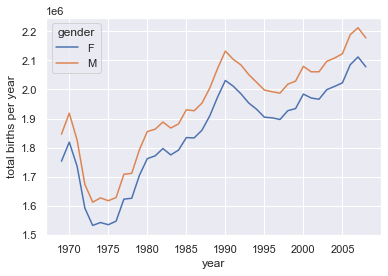

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

With a simple pivot table and ``plot()`` method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.

---

Con una tabla dinámica simple y un método ``plot()``, podemos ver inmediatamente la tendencia anual de nacimientos por género. A simple vista, parece que en los últimos 50 años los nacimientos de varones han superado a los de mujeres en alrededor de un 5%.

### Further data exploration

Though this doesn't necessarily relate to the pivot table, there are a few more interesting features we can pull out of this dataset using the Pandas tools covered up to this point.
We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th).
One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:

---

### Exploración adicional de datos

Aunque esto no necesariamente se relaciona con la tabla dinámica, hay algunas características más interesantes que podemos extraer de este conjunto de datos utilizando las herramientas de Pandas cubiertas hasta este punto. Debemos comenzar limpiando un poco los datos, eliminando los valores atípicos causados ​​por fechas mal escritas (por ejemplo, 31 de junio) o valores faltantes (por ejemplo, 99 de junio). Una forma fácil de eliminarlos todos a la vez es eliminar los valores atípicos; Haremos esto a través de una robusta operación de recorte sigma:

In [50]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [51]:
mu = quartiles[1]
mu

4814.0

In [53]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

689.31

This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution.

With this we can use the ``query()`` method (discussed further in [High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)) to filter-out rows with births outside these values:

---

Esta última línea es una estimación robusta de la media muestral, donde 0,74 proviene del rango intercuartílico de una distribución gaussiana.

Con esto podemos usar el método ``query ()`` ([High-Performance Pandas: ``eval()`` and ``query()``](03.12-Performance-Eval-and-Query.ipynb)) para filtrar filas con nacimientos fuera de estos valores:

In [54]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Next we set the ``day`` column to integers; previously it had been a string because some columns in the dataset contained the value ``'null'``:

---

A continuación, configuramos la columna ``day`` en números enteros; anteriormente había sido una cadena porque algunas columnas en el conjunto de datos contenían el valor ``'null'``:

In [18]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

Finally, we can combine the day, month, and year to create a Date index (see [Working with Time Series](03.11-Working-with-Time-Series.ipynb)).
This allows us to quickly compute the weekday corresponding to each row:

---

Por último, podemos combinar el día, el mes y el año para crear un índice de fecha (consulte [Working with Time Series](03.11-Working-with-Time-Series.ipynb)). Esto nos permite calcular rápidamente el día de la semana correspondiente a cada fila:

In [19]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

Using this we can plot births by weekday for several decades:

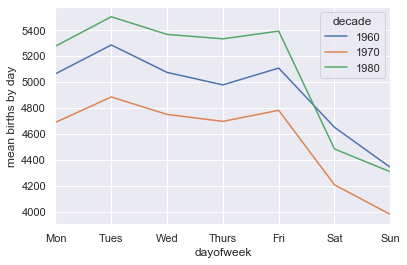

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Apparently births are slightly less common on weekends than on weekdays! Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

Another intersting view is to plot the mean number of births by the day of the *year*.
Let's first group the data by month and day separately:

---

¡Aparentemente, los nacimientos son un poco menos comunes los fines de semana que los días de semana! Tenga en cuenta que faltan las décadas de 1990 y 2000 porque los datos de los CDC contienen solo el mes de nacimiento a partir de 1989.

Otra vista interesante es graficar el número medio de nacimientos por día del *year*. Primero agrupemos los datos por mes y día por separado:

In [21]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

The result is a multi-index over months and days.
To make this easily plottable, let's turn these months and days into a date by associating them with a dummy year variable (making sure to choose a leap year so February 29th is correctly handled!)

---

El resultado es un índice múltiple durante meses y días. Para que esto sea fácil de trazar, convierta estos meses y días en una fecha asociándolos con una variable de año ficticio (¡asegurándose de elegir un año bisiesto para que el 29 de febrero se maneje correctamente!)

In [22]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


Focusing on the month and day only, we now have a time series reflecting the average number of births by date of the year.
From this, we can use the ``plot`` method to plot the data. It reveals some interesting trends:

---

Centrándonos solo en el mes y el día, ahora tenemos una serie de tiempo que refleja el número promedio de nacimientos por fecha del año. A partir de esto, podemos usar el método de ``plot`` para trazar los datos. Revela algunas tendencias interesantes:

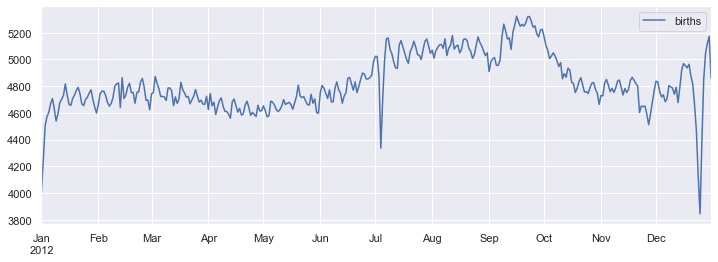

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In particular, the striking feature of this graph is the dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day) although this likely reflects trends in scheduled/induced births rather than some deep psychosomatic effect on natural births.

Looking at this short example, you can see that many of the Python and Pandas tools we've seen to this point can be combined and used to gain insight from a variety of datasets.
We will see some more sophisticated applications of these data manipulations in future sections!

---

En particular, la característica sorprendente de este gráfico es la caída en la tasa de natalidad en los días festivos de Estados Unidos (por ejemplo, Día de la Independencia, Día del Trabajo, Acción de Gracias, Navidad, Año Nuevo), aunque esto probablemente refleja tendencias en los nacimientos programados / inducidos en lugar de algún efecto psicosomático profundo. sobre partos naturales.

Al observar este breve ejemplo, puede ver que muchas de las herramientas de Python y Pandas que hemos visto hasta este punto se pueden combinar y usar para obtener información a partir de una variedad de conjuntos de datos. ¡Veremos algunas aplicaciones más sofisticadas de estas manipulaciones de datos en secciones futuras!